In [1]:
!pip install findspark

In [2]:
import findspark
findspark.init("C:\spark")

In [3]:
from pyspark import SparkContext

# Configrasyon ve Spark Baglantısı

In [4]:
from pyspark import SparkContext
sc=SparkContext(master="local")
sc

<SparkContext master=local appName=pyspark-shell>

In [5]:
sc.version

'3.2.1'

In [6]:
sc.sparkUser()

'LENOVO'

In [7]:
sc.appName

'pyspark-shell'

In [8]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'bina

In [9]:
sc.stop()

In [68]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark-shell>

# Temel DataFrame İşlemleri  

In [6]:
spark_df=spark.read.csv("diabetes.csv",header=True,inferSchema=True)

In [7]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [8]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [12]:
spark_df.cache()# veriyi hızlı kullanmak için işlemi ram'e taşıma işlemi yaparız,veriyi bir bakıma işlenbilir hale getirme işlemi yaptık  

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [11]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [13]:
#python dataframe getirme işlemi 
import seaborn as sns 
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
#python tarafında bazı fonksiyonları kullanamıyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [17]:
spark_df.head()#yukarıdakinin verdiginin farklı bir gösterimini verdi bize 

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [18]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [20]:
spark_df.dtypes#yukarıdakinin verdiginin farklı bir gösterimini verdi bize

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [22]:
#çalışmayacak fonksiyon ise,yani spark dataframe inde bazıları çalışmıyor buna bakmış olduk 
spark_df.ndim#size da hata verir

AttributeError: 'DataFrame' object has no attribute 'ndim'

# Data Frame İşlemleri 

-pandas dataFrame'i paralel olarak çalışma özelligi yokturdur 

-layz mantıktadır,pandas da böyle degildir

-inmutubledır bunu dönüştürme işlemine tabi tutarız,fakat pandas dataframe degiştirilebilir

-pandas dataframe de veri manipülasyounun da daha fazla işlem yap imkanı vardır 


In [23]:
spark_df.show(2)#2 rakamı degitirilebilir

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [25]:
spark_df.count()#gözlem sayısını verir

768

In [28]:
spark_df.columns#degişken isimlerine erişmek istersek

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [29]:
len(spark_df.columns)#yukarıdakinin sayısını bize verir 

9

In [31]:
#özet istatistikleri almak istersek
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [33]:
#özet istatistikleri tek bir degişken için almak istersek
spark_df.describe("Glucose").show()#show u silersek bize yapı özellikerlini verir

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [35]:
#degişken seçme işlemleri ise 
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [36]:
#degişken üzerinde eşsiz deger sayısına erişmek istersek
spark_df.select("Glucose").distinct().count()

136

In [37]:
#veri setinin içindeki çoklama verilerini silmek istersek 
spark_df.select("Glucose").dropDuplicates().show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [39]:
#iki degişken arasında croostab oluşturmak istersek
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [40]:
#eksik gözlem sayısını bulmak için
spark_df.dropna().count()

768

In [41]:
#eksik gözlemlerden kurtulmak istersek 
spark_df.dropna().show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [42]:
#gözlem seçme işlemlerini ele alırsak

In [43]:
spark_df.filter(spark_df.Age>40).count()

194

In [44]:
#gruplama işlemi yapmak istersek
spark_df.groupby("Outcome").count().show()
#show'u kapatırsek göstermez layz yapı dedigimiz bu 

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [45]:
#gruplara göre bir ortalama işlemi alırsak 
spark_df.groupby("Outcome").agg({"BMI":"mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [48]:
#degişken ekleme işlemi,bu var olan bir degişken üzerinden yapıldı
spark_df.withColumn("yeni_degisken",spark_df.BMI/2).select("BMI","yeni_degisken").show()

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
|25.6|         12.8|
|31.0|         15.5|
|35.3|        17.65|
|30.5|        15.25|
| 0.0|          0.0|
|37.6|         18.8|
|38.0|         19.0|
|27.1|        13.55|
|30.1|        15.05|
|25.8|         12.9|
|30.0|         15.0|
|45.8|         22.9|
|29.6|         14.8|
|43.3|        21.65|
|34.6|         17.3|
+----+-------------+
only showing top 20 rows



In [50]:
#degişken ismini nasıl degiştiririz
#aşagıda Outcome bagimli_degisken şeklinde degiştirdik
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [55]:
#bir degişkeni silmek istersek,Insulin'i sildik 
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [58]:
#ram'a çektigimiz işlemleri geri pandasa çekmek istersek
spark_df.groupby("Outcome").count().show()
#sonuna [0:1,0:1]şeklinde yapınca erişim saglayamdık bunun yerine toPandas kullanıcaz

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [62]:
a=spark_df.groupby("Outcome").count().toPandas()#spark dataFrame'i pandas dataframe çevirdik

In [63]:
a

,Outcome,count
0,1,268
1,0,500


In [64]:
#şimdi ise [0:1,0:1] şeklide erişim saglaybiliriz
a.iloc[0:1,0:1]

,Outcome
0,1


# SQL İşlemleri

In [84]:
spark_df.registerTempTable("table_df")

In [85]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [86]:
spark.sql("show tables").show()#tabloları bu şeklilde gözlemliyoruz 

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [87]:
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [89]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)

Py4JJavaError: An error occurred while calling o249.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 81.0 failed 1 times, most recent failure: Lost task 0.0 in stage 81.0 (TID 62) (Administrator executor driver): java.io.FileNotFoundException: C:\Users\LENOVO\AppData\Local\Temp\blockmgr-f57337ae-4ebf-4ab9-9f86-418acb9da042\37\temp_shuffle_07a11c44-4fe9-4766-8387-28fcb6046e24 (The system cannot find the path specified)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(FileOutputStream.java:270)
	at java.io.FileOutputStream.<init>(FileOutputStream.java:213)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:133)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:152)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:279)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.io.FileNotFoundException: C:\Users\LENOVO\AppData\Local\Temp\blockmgr-f57337ae-4ebf-4ab9-9f86-418acb9da042\37\temp_shuffle_07a11c44-4fe9-4766-8387-28fcb6046e24 (The system cannot find the path specified)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(FileOutputStream.java:270)
	at java.io.FileOutputStream.<init>(FileOutputStream.java:213)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:133)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:152)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:279)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:171)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)


# Büyük Veri Görselleştirme 

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
sns.barplot(x="Outcome",y=spark_df.Outcome.index,data=spark_df)
#spark_df olarak çalıştırdıgımız için hata verdi bize 

AttributeError: 'DataFrame' object has no attribute 'get'

büyük veri görselleştirme aslında 2 basamaktan oluşuyor,

1.veriyi spark tarafında agreegate etmek,dönüştürme işlemi yapmak

2.sonra toPandas'a çekip alışık oludugumuz işlemlere tabi tutarız

In [96]:
sdf=spark_df.toPandas()
sdf.head()
#burada veri küçük oldugu için spark dataFrame'ini çevirdik

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome'>

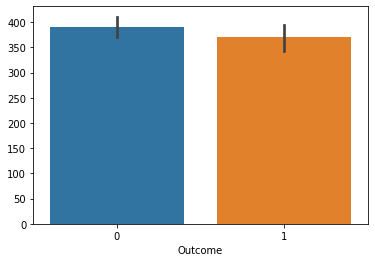

In [97]:
sns.barplot(x="Outcome",y=sdf.Outcome.index,data=sdf)